In [236]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [237]:
# y = iris-versicolor , iris-virginica 0 1
iris = datasets.load_iris()
x,y = iris.data[50:,[1,2]],iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

In [238]:
#dataset split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.5,
                                                 random_state = 1,
                                                 stratify = y)

In [239]:
#logisticregression , decision tree , KNN

clf1 = LogisticRegression(penalty='l2',C = 0.001,solver = 'lbfgs', random_state = 3)

clf2 = KNeighborsClassifier(n_neighbors = 3,p=2,metric='minkowski')

clf3 = DecisionTreeClassifier(max_depth = 3,criterion = 'entropy',random_state = 3)

pipe1 = Pipeline([['sc',StandardScaler()],['clf',clf1]])

pipe2 = Pipeline([['sc',StandardScaler()],['clf',clf2]])

In [240]:
# 10-fold cross validation

clf_labels = ['Logistic regression','KNN','Decision tree']

for clf,label in zip([pipe1,pipe2,clf3],clf_labels):
    scores = cross_val_score(estimator = clf,
                             X = x_train,
                             y = y_train,
                             cv = 10,
                             scoring = 'roc_auc')
    print(('roc auc: %.2f +/- %.2f [%s]') % (scores.mean(),scores.std(),label))

roc auc: 0.92 +/- 0.15 [Logistic regression]
roc auc: 0.97 +/- 0.10 [KNN]
roc auc: 0.94 +/- 0.13 [Decision tree]


# Decision Area

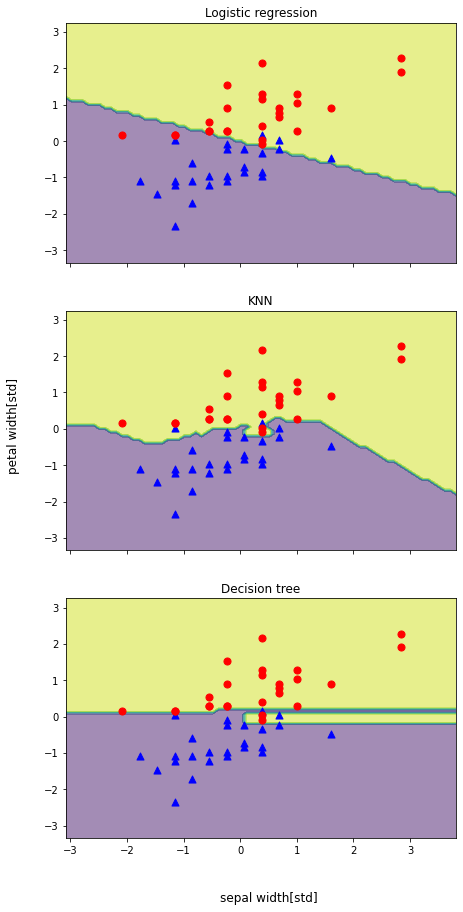

<bound method Pipeline.get_params of Pipeline(steps=[('sc', StandardScaler()),
                ['clf', LogisticRegression(C=0.001, random_state=3)]])>
<bound method Pipeline.get_params of Pipeline(steps=[('sc', StandardScaler()),
                ['clf', KNeighborsClassifier(n_neighbors=3)]])>
<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=3)>


In [241]:
from itertools import product
all_clf = [pipe1,pipe2,clf3]

sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)

x_min = x_train_std[:,0].min() - 1
x_max = x_train_std[:,0].max() + 1
y_min = x_train_std[:,1].min() - 1
y_max = x_train_std[:,1].max() + 1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),
                    np.arange(y_min,y_max,0.1))

f,axarr = plt.subplots(3,1,
                       sharex='col',
                       sharey='row',
                       figsize=(7,15))

for idx,clf,tt in zip(range(3),all_clf,clf_labels):
    clf.fit(x_train_std,y_train)
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    axarr[idx].contourf(xx,yy,z,alpha = 0.5)
    
    axarr[idx].scatter(x_train_std[y_train==0,0],
                                 x_train_std[y_train==0,1],
                                 c ='b',
                                 marker='^',
                                 s =50 )

    axarr[idx].scatter(x_train_std[y_train==1,0],
                                 x_train_std[y_train==1,1],
                                 c ='r',
                                 marker='o',
                                 s =50 )

    axarr[idx].set_title(tt)

plt.text(0.5,-5,s ='sepal width[std]',ha='center',va='center',fontsize =12 )
plt.text(-4,8,s ='petal width[std]',ha='center',va='center',fontsize =12 , rotation = 90 )
plt.show()
for i in range(0,3):
    print(all_clf[i].get_params)

# AdaBoots

In [242]:
tree = DecisionTreeClassifier(criterion = 'entropy',random_state=1,max_depth=1)
ada = AdaBoostClassifier(base_estimator = tree,
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1)

dad train/test:0.940/0.900


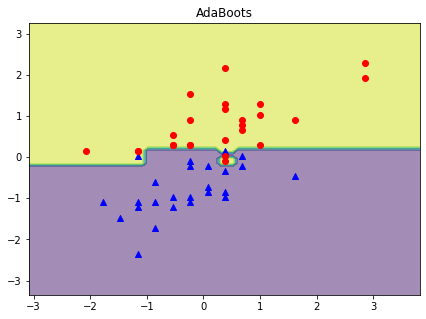

In [243]:
ada.fit(x_train,y_train)
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)
ada_train_score = accuracy_score(y_train,y_train_pred)
ada_test_score = accuracy_score(y_test,y_test_pred)

print('dad train/test:%.3f/%.3f' %(ada_train_score,ada_test_score))

x_min = x_train_std[:,0].min() - 1
x_max = x_train_std[:,0].max() + 1
y_min = x_train_std[:,1].min() - 1
y_max = x_train_std[:,1].max() + 1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),
                    np.arange(y_min,y_max,0.1))

f,axarr = plt.subplots(1,
                       sharex='col',
                       sharey='row',
                       figsize=(7,5))

for idx,clf,tt in zip([0,1],[ada],['AdaBoots']):
    clf.fit(x_train_std,y_train)
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    axarr.contourf(xx,yy,z,alpha = 0.5)
    
    axarr.scatter(x_train_std[y_train==0,0],
                                 x_train_std[y_train==0,1],
                                 c ='b',
                                 marker='^')

    axarr.scatter(x_train_std[y_train==1,0],
                                 x_train_std[y_train==1,1],
                                 c ='r',
                                 marker='o')

    axarr.set_title(tt)